In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [53]:
df = pd.read_csv('student_clustering.csv')
df.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


In [54]:
df.shape

(200, 2)

Text(0, 0.5, 'Iq')

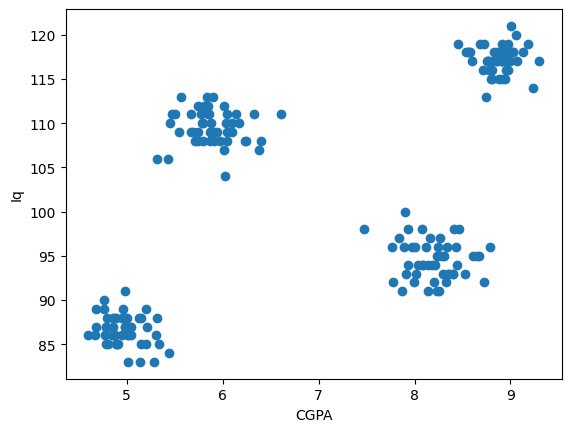

In [55]:
plt.scatter(df['cgpa'],df['iq'])
plt.xlabel("CGPA")
plt.ylabel("Iq")

In [56]:
WCSS = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(df)
    WCSS.append(km.inertia_)

In [57]:
WCSS

[29957.898288,
 4184.14127,
 2503.397581,
 681.96966,
 563.7685674520716,
 532.1191504875119,
 357.7251657584069,
 233.54082485509014,
 220.10347846621534,
 206.86313828458327]

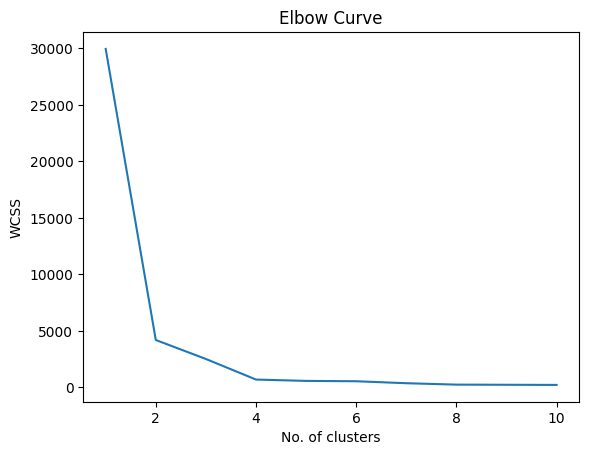

In [58]:
plt.plot(range(1,11),WCSS)
plt.xlabel("No. of clusters")
plt.ylabel("WCSS")
plt.title("Elbow Curve")
plt.show()

In [59]:
X = df.iloc[:,:].values

km = KMeans(n_clusters=4)
y_means = km.fit_predict(X)

In [60]:
y_means

array([3, 0, 1, 1, 0, 0, 1, 2, 0, 1, 3, 0, 1, 3, 0, 1, 0, 1, 0, 0, 1, 3,
       1, 3, 3, 1, 3, 2, 1, 0, 2, 0, 2, 0, 1, 1, 2, 0, 3, 0, 3, 1, 1, 3,
       2, 2, 1, 0, 2, 0, 3, 3, 2, 1, 2, 0, 0, 2, 0, 2, 0, 1, 1, 2, 3, 2,
       1, 3, 0, 1, 0, 2, 1, 3, 0, 2, 0, 2, 3, 1, 1, 2, 0, 3, 2, 3, 2, 0,
       2, 0, 2, 2, 1, 3, 1, 1, 2, 1, 3, 2, 0, 3, 3, 2, 3, 3, 1, 3, 2, 2,
       1, 2, 0, 0, 1, 2, 1, 0, 2, 3, 3, 0, 1, 2, 1, 3, 1, 0, 3, 1, 1, 0,
       3, 3, 0, 2, 0, 3, 1, 1, 1, 3, 0, 3, 3, 2, 3, 2, 0, 3, 2, 3, 2, 2,
       3, 1, 0, 2, 0, 1, 3, 2, 0, 1, 2, 3, 0, 3, 3, 2, 2, 0, 2, 3, 3, 1,
       2, 0, 3, 2, 2, 0, 0, 0, 1, 3, 1, 1, 2, 0, 1, 1, 3, 3, 1, 3, 2, 0,
       0, 2])

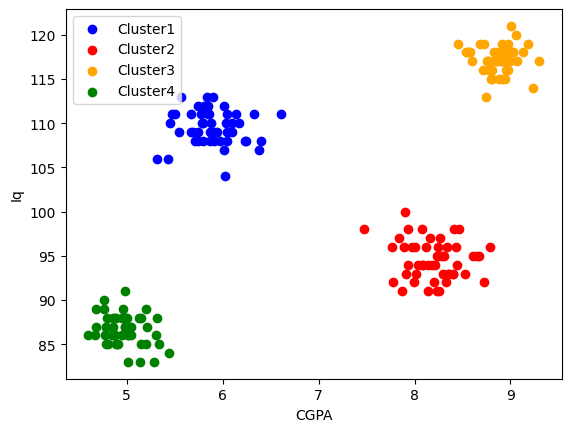

In [61]:
plt.scatter(X[y_means ==0,0],X[y_means ==0,1],color='blue',label='Cluster1')
plt.scatter(X[y_means ==1,0],X[y_means ==1,1],color='red',label='Cluster2')
plt.scatter(X[y_means ==2,0],X[y_means ==2,1],color='orange',label='Cluster3')
plt.scatter(X[y_means ==3,0],X[y_means ==3,1],color='green',label='Cluster4')
plt.xlabel("CGPA")
plt.ylabel("Iq")
plt.legend()
plt.show()

## K Means on 3D Data :

In [62]:
from sklearn.datasets import make_blobs

centroids = [(-5,-5,5),(5,5,-5),(3.5,-2.5,4),(-2.5,2.5,-4)]
cluster_std = [1,1,1,1]

X,y = make_blobs(n_samples=200,cluster_std=cluster_std,centers=centroids,n_features=3,random_state=1)

In [63]:
import plotly.express as px
fig = px.scatter_3d(x=X[:,0], y=X[:,1], z=X[:,2])
fig.show()

In [64]:
wcss = []
for i in range(1,21):
    km = KMeans(n_clusters=i)
    km.fit_predict(X)
    wcss.append(km.inertia_)

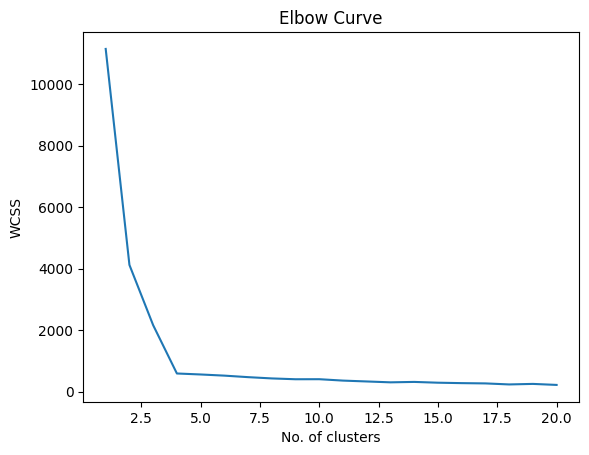

In [65]:
plt.plot(range(1,21),wcss)
plt.xlabel("No. of clusters")
plt.ylabel("WCSS")
plt.title("Elbow Curve")
plt.show()

In [66]:
km = KMeans(n_clusters=4)
y_pred = km.fit_predict(X)

In [67]:
df = pd.DataFrame()

df['col1'] = X[:,0]
df['col2'] = X[:,1]
df['col3'] = X[:,2]
df['label'] = y_pred

In [68]:
fig = px.scatter_3d(df,x='col1', y='col2', z='col3',color='label')
fig.show()